In [1]:
import sys
sys.path.append('../../../scripts/')
from keras.models import load_model
import Preprocessing as Prep
from my_callbacks import coef_det_k
from keras import backend as K
import numpy as np
import pickle
from  sklearn.metrics import mean_squared_error as MSE

Using TensorFlow backend.


In [2]:
def coef_det_k_2(y_true, y_pred):
    """Computer coefficient of determination R^2
    """
    SS_res = np.sum(np.square(y_true - y_pred))
    SS_tot = np.sum(np.square(y_true - np.mean(y_true)))
    return 1 - SS_res / (SS_tot + 1e-6)

In [3]:
def test_one_model(model_file):
    X_hot, Y_hot = Prep.make_encoding('../data/cleaned_enzyme_topts_v1_test.fasta')
    model = load_model(model_file,custom_objects={'coef_det_k':coef_det_k})
    yp = model.predict(X_hot)
    r2_test = coef_det_k_2(Y_hot,yp)
    rmse = np.sqrt(MSE(Y_hot,yp))
    print(r2_test)
    K.clear_session()
    del model, X_hot
    return r2_test,rmse, Y_hot, yp

In [4]:
model_file = '../../../results/pre_train_on_ogt_dataset/RES1_UniDist_D2512_1e4_B128/bestmodel.h5'
r2_test,rmse, Y_hot, yp = test_one_model(model_file)

(190, 2000, 20) (190, 1)
-0.32032113866542433


In [5]:
data = {'r2_score':r2_test,'rmse':rmse,'topt_predicted':yp,'true_topt':Y_hot}

In [9]:
pickle.dump(data,open('../../../results/topt_models/TL_RES1_fronzen_all_layers.pkl','wb'))

In [7]:
import matplotlib.pyplot as plt

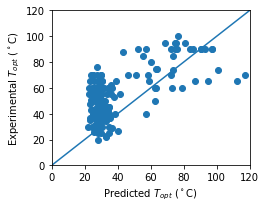

In [17]:
plt.figure(figsize=(3.8,3))
lim = [0,120]
plt.scatter(yp,Y_hot,zorder=1)
plt.plot(lim,lim,zorder=0)
plt.xlim(lim)
plt.ylim(lim)

plt.xlabel('Predicted $T_{opt}$ ($^\circ$C)')
plt.ylabel('Experimental $T_{opt}$ ($^\circ$C)')
plt.tight_layout()
plt.savefig('../../../results/figures/TL_Topt_RES1_frozen_all_layers.pdf')
plt.show()